 <div class="header">
  <h1>Students Performance on Exams</h1>
  <p style = #83898b><i>Looking at students performances on exams given their parents education, lunch and test preperation</i></p>
</div> 


<h3>Introduction</h3>
Every year one of the most important tasks for students is performing well on exams. Exams are one of the primary forms of assessment for any course that can determine a large portion of a student's grade. In turn, higher grades can lead to numerous benefits for students such as scholarships and coop addmission. Whereas lower, or failing, grades caused by poor exam performance can lead to dropping out or unemployment. Therefore, this is not only an important task, but one that can cause significant amount of stress among students. Thus, it is important to find out what factors cause students to pass their exams and what factors have a significant impact on student's performance on these exams, or possibly even which ones may not, for future exams that students may take. The factors being explored are parents education, students lunch and test preperation. An exploratory analysis of the relationship between these factors and student performance on exams will be conducted to determine if there is indeed a correlation between them.


![Image of student doing an exam](https://uwaterloo.ca/writing-and-communication-centre/sites/default/files/styles/large/public/uploads/images/tips-for-students-exam.gif?itok=3eNEo6UX)


<sup>n/a, via [University of Waterloo](https://uwaterloo.ca/writing-and-communication-centre/blog/topic/questions)</sup>


<h2>Methods</h2>
<h3>Data Collection/Locating</h3>

The data used in this assignment was obtained from [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams), which is a free online website for publishing and finding open source data sets [1].

In [1]:
# Importing necessary python modules for arrays and graphing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading in data (sp stands for student performance)
sp = pd.read_csv('StudentsPerformance.csv')

c:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3>Data Cleaning</h3>

Column names were simplified, unused columns were deleted, values within columns were replaced with numbers for summations and rows with missing data were deleted if possible.

In [2]:
# Simplified column names
sp.columns = ["gender","race","parentsEducation","lunch","testPrep", "mathScore", "readingScore", "writingScore"]

# Deleting Unused Coloumns 
sp = sp.drop(sp.columns[[0,1]], axis=1)

# Replacing names within columns to numbers for numerical operations (primarily summations)
sp = sp.replace({'parentsEducation': {'master\'s degree': 1, 'bachelor\'s degree': 2, 'associate\'s degree': 3, 'some college': 4, 'high school': 5, 'some high school': 6}})
sp = sp.replace({'lunch': {'standard': 1, 'free/reduced': 2}})
sp = sp.replace({'testPrep': {'completed': 1, 'none': 2}})

# Adding in new columns for passing grades
sp["passedMath"] = sp['mathScore'] >= 50
sp["passedReading"] = sp['readingScore'] >= 50
sp["passedWriting"] = sp['writingScore'] >= 50

# Replacing boolean values with yes and no for reading in tables and graphs later on
sp = sp.replace({'passedMath' : {True: 'Yes', False: 'No'}})
sp = sp.replace({'passedReading' : {True: 'Yes', False: 'No'}})
sp = sp.replace({'passedWriting' : {True: 'Yes', False: 'No'}})


# Deleting rows in case they have missing data
sp = sp.dropna(axis=0)

<h3>Data Analysis</h3>

I will look at the impact that parents education, lunch and test preperation have on student performances on exams. This will be done through methods of exploratory analysis such as statistics, explanations and data visualizations.

<h3>General Distributions</h3>

First we will look at some general distritbutions about student grades.

Here, the mean, min and max of each exam score were calculated. The mean scores will be referenced later in the document.

In [3]:
mathScore = sp.mathScore.describe()
readingScore = sp.readingScore.describe()
writingScore = sp.writingScore.describe()


# Summary of student scores on exams before analyzing factors
print(f"Mean Math Score: {round(mathScore['mean'],2)}")
print(f"Max Math Score: {round(mathScore['max'],2)}")
print(f"Min Math Score: {round(mathScore['min'],2)}")
print('\n')

print(f"Mean Reading Score: {round(readingScore['mean'],2)}")
print(f"Max Reading Score: {round(readingScore['max'],2)}")
print(f"Min Reading Score: {round(readingScore['min'],2)}")
print('\n')

print(f"Mean Writing Score: {round(writingScore['mean'],2)}")
print(f"Max Writing Score: {round(writingScore['max'],2)}")
print(f"Min Writing Score: {round(writingScore['min'],2)}")
print('\n')


Mean Math Score: 66.09
Max Math Score: 100.0
Min Math Score: 0.0


Mean Reading Score: 69.17
Max Reading Score: 100.0
Min Reading Score: 17.0


Mean Writing Score: 68.05
Max Writing Score: 100.0
Min Writing Score: 10.0




A visual represenation of student's performance on each exam score. 

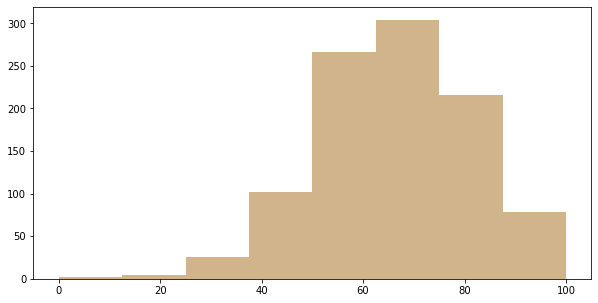

In [4]:
mathScoreSummaries = sp.mathScore.hist(bins=8, figsize=(10,5), grid=False, color = 'tan')

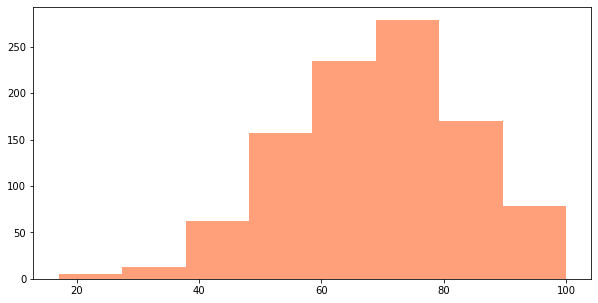

In [5]:
readingScoreSummaries = sp.readingScore.hist(bins=8, figsize=(10,5), grid=False, color = 'lightsalmon')


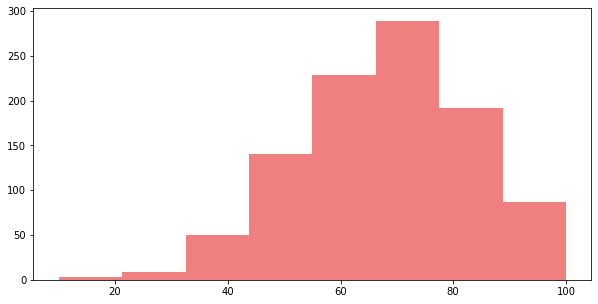

In [6]:
writingScoreSummaries = sp.writingScore.hist(bins=8, figsize=(10,5), grid = False, color = 'lightcoral')


<h3>Parents Education on Student Exam Scores</h3>

Examining the relationship between parent's education and exam scores revealed that the averages of students whose parents had a master's degree saw an improvement of 3.7% from the mean math score, a 6.2% from the mean reading score and a 7.6% from the mean writing score. 

This was the highest imrovement compared to all the other degrees and is contrasted by a parent with a high school diploma for example. Students whose parents had a high school diploma were 4.0% below the mean math score, 4.5% below the mean reading score and 5.6% below the mean writing score. 

Scores would also generally (with some exceptions) get worse as the tier of the degree got lower. For example, the average score of students whose parents got a high school diploma saw all of their exam marks end up below the mean scores.

In [7]:
# Uses loc function to locate each degree and find each of the respective exams score averages of the students

print(f"Average math score of students whose parents had a Master's Degrees: {round(sp.loc[sp.parentsEducation == 1].mathScore.mean(),2)}")
print(f"Average reading score of students whose parents had a Master's Degrees: {round(sp.loc[sp.parentsEducation == 1].readingScore.mean(),2)}")
print(f"Average writing score of students whose parents had a Master's Degrees: {round(sp.loc[sp.parentsEducation == 1].writingScore.mean(),2)}")
print('\n')

print(f"Average math score of students whose parents had a Bachleor's Degrees: {round(sp.loc[sp.parentsEducation == 2].mathScore.mean(),2)}")
print(f"Average reading score of students whose parents had a Bachleor's Degrees: {round(sp.loc[sp.parentsEducation == 2].readingScore.mean(),2)}")
print(f"Average writing score of students whose parents had a Bachleor's Degrees: {round(sp.loc[sp.parentsEducation == 2].writingScore.mean(),2)}")
print('\n')


print(f"Average math score of students whose parents had an Associate's Degrees: {round(sp.loc[sp.parentsEducation == 3].mathScore.mean(),2)}")
print(f"Average reading score of students whose parents had an Associate's Degrees: {round(sp.loc[sp.parentsEducation == 3].readingScore.mean(),2)}")
print(f"Average writing score of students whose parents had an Associate's Degrees: {round(sp.loc[sp.parentsEducation == 3].writingScore.mean(),2)}")
print('\n')


print(f"Average math score of students whose parents had some college Degree: {round(sp.loc[sp.parentsEducation == 4].mathScore.mean(),2)}")
print(f"Average reading score of students whose parents had some college Degree: {round(sp.loc[sp.parentsEducation == 4].readingScore.mean(),2)}")
print(f"Average writing score of students whose parents had some college Degree: {round(sp.loc[sp.parentsEducation == 4].writingScore.mean(),2)}")
print('\n')


print(f"Average math score of students whose parents had a high school diploma: {round(sp.loc[sp.parentsEducation == 5].mathScore.mean(),2)}")
print(f"Average reading score of students whose parents had a high school diploma: {round(sp.loc[sp.parentsEducation == 5].readingScore.mean(),2)}")
print(f"Average writing score of students whose parents had a high school diploma: {round(sp.loc[sp.parentsEducation == 5].writingScore.mean(),2)}")
print('\n')


Average math score of students whose parents had a Master's Degrees: 69.75
Average reading score of students whose parents had a Master's Degrees: 75.37
Average writing score of students whose parents had a Master's Degrees: 75.68


Average math score of students whose parents had a Bachleor's Degrees: 69.39
Average reading score of students whose parents had a Bachleor's Degrees: 73.0
Average writing score of students whose parents had a Bachleor's Degrees: 73.38


Average math score of students whose parents had an Associate's Degrees: 67.88
Average reading score of students whose parents had an Associate's Degrees: 70.93
Average writing score of students whose parents had an Associate's Degrees: 69.9


Average math score of students whose parents had some college Degree: 67.13
Average reading score of students whose parents had some college Degree: 69.46
Average writing score of students whose parents had some college Degree: 68.84


Average math score of students whose parents had 

In [8]:
print(f"Average math score of students whose parents had some high school: {round(sp.loc[sp.parentsEducation == 6].mathScore.mean(),2)}")
print(f"Average reading score of students whose parents had some high school: {round(sp.loc[sp.parentsEducation == 6].readingScore.mean(),2)}")
print(f"Average writing score of students whose parents had some high school: {round(sp.loc[sp.parentsEducation == 6].writingScore.mean(),2)}")

Average math score of students whose parents had some high school: 63.5
Average reading score of students whose parents had some high school: 66.94
Average writing score of students whose parents had some high school: 64.89


Here are the visual comparisons using seaborn barplots.

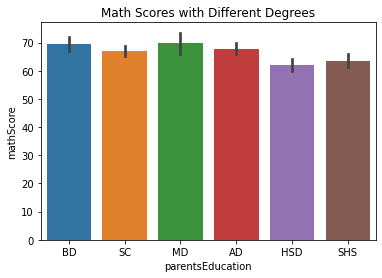

In [9]:
# Parents Education values were converted back to words for the sake of the graph
# MD = Master's Degree, BD = Bachleor's Degree, AD = Associate's Degree, SC = Some College, HSD = High School Diploma, SHS = Some High School
sp = sp.replace({'parentsEducation': {1: 'MD', 2: 'BD', 3: 'AD', 4: 'SC', 5: 'HSD', 6: 'SHS'}})

# Graph using seaborn barplot
stdVsFreeM = sns.barplot(data=sp, x="parentsEducation", y="mathScore").set(title='Math Scores with Different Degrees')

# Graph of Math Score with the different types of degrees

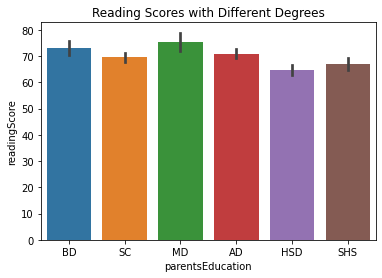

In [10]:
stdVsFreeR = sns.barplot(data=sp, x="parentsEducation", y="readingScore").set(title='Reading Scores with Different Degrees')

# Graph of reading Score with the different types of degrees

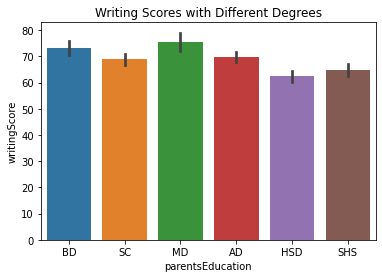

In [11]:
stdVsFreeW = sns.barplot(data=sp, x="parentsEducation", y="writingScore").set(title='Writing Scores with Different Degrees')

# Graph of writing Score with the different types of degrees

This data above may suggest that genetics or the way parents taught their children (the students) played a role in their performance on exams. 

For example, the children who had the best overall averages on their exam scores were those whose parents had a master's degree. This may suggest that those parents had higher standards for how much they wanted their kids to study and taught them the importance of discipline in studying.

<h3>Lunch on Student Exam Scores</h3>

The averages of students who had a standard lunch saw an improvement of 4.2% from the mean math score, a 2.5% improvement from the mean reading score and a 2.8% improvement from the mean writing score. 

Whereas, the averages of students who had a free/reduced lunch were 7.2% below the mean math score, 4.5% below the mean reading score and 5.0% below the mean writing score.

In [12]:
# Uses loc function to locate each type of lunch students had and find each of their respective exams score averages

print(f"Average math score of students who had a standard lunch: {round(sp.loc[sp.lunch == 1].mathScore.mean(),2)}")
print(f"Average reading score of students who had a standard lunch: {round(sp.loc[sp.lunch == 1].readingScore.mean(),2)}")
print(f"Average writing score of students who had a standard lunch: {round(sp.loc[sp.lunch == 1].writingScore.mean(),2)}")
print('\n')

print(f"Average math score of students who had a free/reduced lunch: {round(sp.loc[sp.lunch == 2].mathScore.mean(),2)}")
print(f"Average reading score of students who had a free/reduced lunch: {round(sp.loc[sp.lunch == 2].readingScore.mean(),2)}")
print(f"Average writing score of students who had a free/reduced lunch: {round(sp.loc[sp.lunch == 2].writingScore.mean(),2)}")
print('\n')



Average math score of students who had a standard lunch: 70.03
Average reading score of students who had a standard lunch: 71.65
Average writing score of students who had a standard lunch: 70.82


Average math score of students who had a free/reduced lunch: 58.92
Average reading score of students who had a free/reduced lunch: 64.65
Average writing score of students who had a free/reduced lunch: 63.02




Here are some visual comparisons of this data with seaborn line plots.

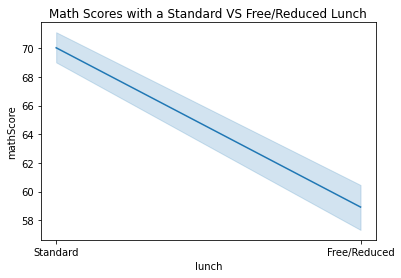

In [13]:

# Lunch values were converted back to words for the sake of the graph
sp = sp.replace({'lunch': {1: 'Standard', 2: 'Free/Reduced'}})

# Graph using seaborn lineplot
stdVsFreeM = sns.lineplot(data=sp, x="lunch", y="mathScore").set(title='Math Scores with a Standard VS Free/Reduced Lunch')

# Graph of Math Score with a standard vs free/reduced lunch

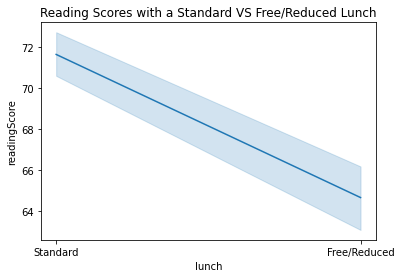

In [14]:
stdVsFreeR = sns.lineplot(data=sp, x="lunch", y="readingScore").set(title='Reading Scores with a Standard VS Free/Reduced Lunch')

# Graph of reading Score with a standard vs free/reduced lunch

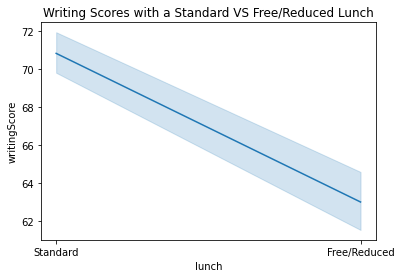

In [15]:
stdVsFreeW = sns.lineplot(data=sp, x="lunch", y="writingScore").set(title='Writing Scores with a Standard VS Free/Reduced Lunch')

# Graph of writing Score with a standard vs free/reduced lunch

Therefore, this data suggests that eating a full healthy lunch rather than something like a lunchable won't greatly increase student's exam scores compared to the type of degree their parents had, but will definitely prevent students from having a much greater decrease in their scores. Furthermore, generally students with a standard lunch performed better than those with a free/reduced lunch.

<h3>Test Preperation on Student Exam Scores</h3>

Analysis of this relationship showed that students who were prepared for exams showed an improvement of 3.61% from the mean math score, a 4.72% improvement from the mean reading score and a 6.37% improvement from the mean writing score.

On the other hand, the averages of students who were not prepared for exams were 2.0% below the mean math score, 2.6% below the mean reading score and 3.6% below the mean writing score.

In [16]:
# Uses loc function to locate each student who did and did not prepare for exams and find each of their respective exams score averages

print(f"Average math score of students who prepared for the exams: {round(sp.loc[sp.testPrep == 1].mathScore.mean(),2)}")
print(f"Average reading score of students who prepared for the exams: {round(sp.loc[sp.testPrep == 1].readingScore.mean(),2)}")
print(f"Average writing score of students who prepared for the exams: {round(sp.loc[sp.testPrep == 1].writingScore.mean(),2)}")
print('\n')

print(f"Average math score of students who did not prepare for the exams: {round(sp.loc[sp.testPrep == 2].mathScore.mean(),2)}")
print(f"Average reading score of students who did not prepare for the exams: {round(sp.loc[sp.testPrep == 2].readingScore.mean(),2)}")
print(f"Average writing score of students who did not prepare for the exams: {round(sp.loc[sp.testPrep == 2].writingScore.mean(),2)}")
print('\n')


Average math score of students who prepared for the exams: 69.7
Average reading score of students who prepared for the exams: 73.89
Average writing score of students who prepared for the exams: 74.42


Average math score of students who did not prepare for the exams: 64.08
Average reading score of students who did not prepare for the exams: 66.53
Average writing score of students who did not prepare for the exams: 64.5




Here are some box plot graphs in seaborn that visualize this data.

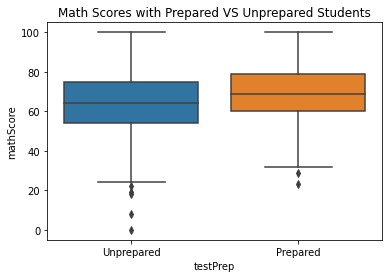

In [17]:
# Lunch values were converted back to words for the sake of the graph
sp = sp.replace({'testPrep': {1: 'Prepared', 2: 'Unprepared'}})

# Graph using seaborn boxplot
stdVsFreeM = sns.boxplot(data=sp, x="testPrep", y="mathScore").set(title='Math Scores with Prepared VS Unprepared Students')

# Graph of Math Score with prepared vs not prepared students

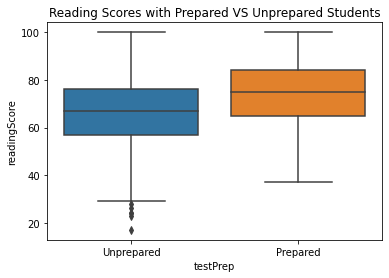

In [18]:
stdVsFreeR = sns.boxplot(data=sp, x="testPrep", y="readingScore").set(title='Reading Scores with Prepared VS Unprepared Students')

# Graph of Reading Score with prepared vs not prepared students

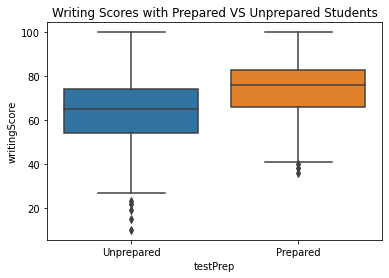

In [19]:
stdVsFreeW = sns.boxplot(data=sp, x="testPrep", y="writingScore").set(title='Writing Scores with Prepared VS Unprepared Students')

# Graph of Writing Score with prepared vs not prepared students

Thus, we can infer from the data above that studying and preparing for exams can help significantly in increasing students performance on exams. However, not studying did not show significant decreases on average exam scores.

<h3>Parent's Education, Lunch and Test Preperation on Student Exam Scores</h3>

Here, we will look at how all three factors play a role in a student's ability to pass their exams.

In [20]:
# Grouped operations
groupedSP_M = sp.groupby(['parentsEducation','lunch','testPrep', 'passedMath']).size().unstack()
groupedSP_M
# Remember -> MD = Master's Degree, BD = Bachleor's Degree, AD = Associate's Degree, SC = Some College, HSD = High School Diploma, SHS = Some High School


passedMath                                  No   Yes
parentsEducation lunch        testPrep              
AD               Free/Reduced Prepared     4.0  25.0
                              Unprepared  11.0  37.0
                 Standard     Prepared     NaN  53.0
                              Unprepared  12.0  80.0
BD               Free/Reduced Prepared     4.0  13.0
                              Unprepared   5.0  22.0
                 Standard     Prepared     NaN  29.0
                              Unprepared   2.0  43.0
HSD              Free/Reduced Prepared     4.0  20.0
                              Unprepared  20.0  26.0
                 Standard     Prepared     NaN  32.0
                              Unprepared   9.0  85.0
MD               Free/Reduced Prepared     2.0  10.0
                              Unprepared   4.0   8.0
                 Standard     Prepared     NaN   8.0
                              Unprepared   NaN  27.0
SC               Free/Reduced Prepared     5.0  21.0
                              Unprepared  13.0  40.0
                 Standard     Prepared     NaN  51.0
                              Unprepared   4.0  92.0
SHS              Free/Reduced Prepared     5.0  18.0
                              Unprepared  19.0  19.0
                 Standard     Prepared     4.0  50.0
                              Unprepared   8.0  56.0

In [21]:
groupedSP_R = sp.groupby(['parentsEducation','lunch','testPrep', 'passedReading']).size().unstack()
groupedSP_R

passedReading                               No   Yes
parentsEducation lunch        testPrep              
AD               Free/Reduced Prepared     2.0  27.0
                              Unprepared   3.0  45.0
                 Standard     Prepared     NaN  53.0
                              Unprepared   8.0  84.0
BD               Free/Reduced Prepared     1.0  16.0
                              Unprepared   3.0  24.0
                 Standard     Prepared     NaN  29.0
                              Unprepared   3.0  42.0
HSD              Free/Reduced Prepared     3.0  21.0
                              Unprepared  13.0  33.0
                 Standard     Prepared     3.0  29.0
                              Unprepared   8.0  86.0
MD               Free/Reduced Prepared     1.0  11.0
                              Unprepared   NaN  12.0
                 Standard     Prepared     NaN   8.0
                              Unprepared   NaN  27.0
SC               Free/Reduced Prepared     2.0  24.0
                              Unprepared   8.0  45.0
                 Standard     Prepared     NaN  51.0
                              Unprepared  10.0  86.0
SHS              Free/Reduced Prepared     2.0  21.0
                              Unprepared  13.0  25.0
                 Standard     Prepared     2.0  52.0
                              Unprepared   5.0  59.0

In [22]:
groupedSP_W = sp.groupby(['parentsEducation','lunch','testPrep', 'passedWriting']).size().unstack()
groupedSP_W

passedWriting                               No   Yes
parentsEducation lunch        testPrep              
AD               Free/Reduced Prepared     1.0  28.0
                              Unprepared   6.0  42.0
                 Standard     Prepared     NaN  53.0
                              Unprepared  10.0  82.0
BD               Free/Reduced Prepared     1.0  16.0
                              Unprepared   5.0  22.0
                 Standard     Prepared     NaN  29.0
                              Unprepared   3.0  42.0
HSD              Free/Reduced Prepared     2.0  22.0
                              Unprepared  18.0  28.0
                 Standard     Prepared     4.0  28.0
                              Unprepared  13.0  81.0
MD               Free/Reduced Prepared     1.0  11.0
                              Unprepared   NaN  12.0
                 Standard     Prepared     NaN   8.0
                              Unprepared   NaN  27.0
SC               Free/Reduced Prepared     NaN  26.0
                              Unprepared  11.0  42.0
                 Standard     Prepared     NaN  51.0
                              Unprepared  11.0  85.0
SHS              Free/Reduced Prepared     3.0  20.0
                              Unprepared  13.0  25.0
                 Standard     Prepared     4.0  50.0
                              Unprepared   8.0  56.0

Data from these tables show that on all three exams, generally, more students were likely to fail with a combination of a lower tier degree, a free/reduced lunch and showing up unprepared for exams. 

This can be seen in the math scores where the most amount of fails (20) came from students who ate a free/reduced lunch, were unprepared and whose parents had a high school diploma. 

Another example can be seen in the reading exams where the most amount of fails (13) came from students who ate a free/reduced lunch, were unprepared and whose parents either had a high school diploma or some high school experience.

Finally, in the writing exams, the same trend continued where the majority of fails (18) came from students who ate a free/reduced lunch, were unprepared and whose parents had a high school diploma.

Here is a more graphical representation of this data.

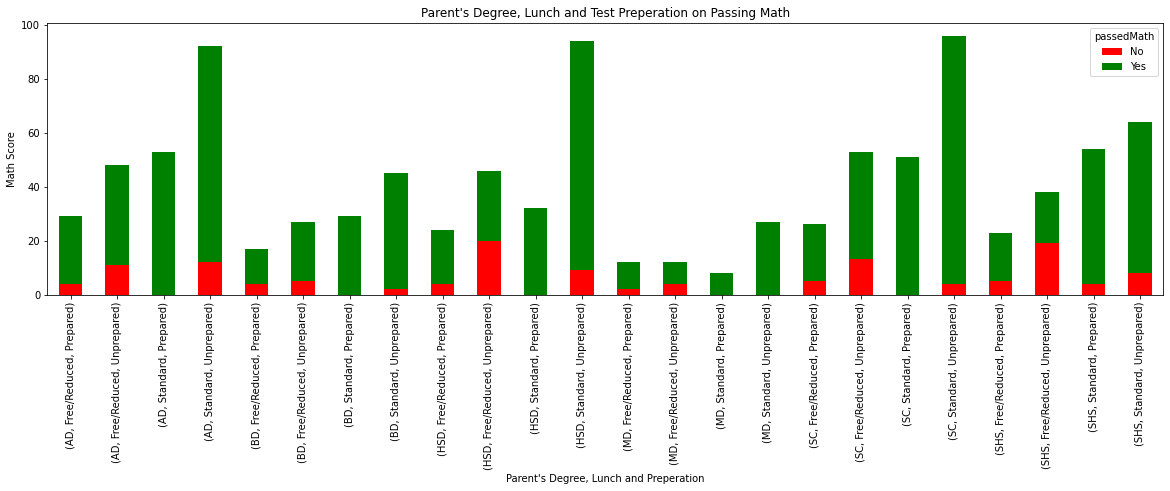

In [23]:
# Using table data to create grouped plot
spBar_M = groupedSP_M.plot.bar(stacked=True, color = ["red", "green"], 
figsize=(20,5), title="Parent's Degree, Lunch and Test Preperation on Passing Math")
plt.ylabel("Math Score")
plt.xlabel('Parent\'s Degree, Lunch and Preperation')
plt.show(spBar_M)

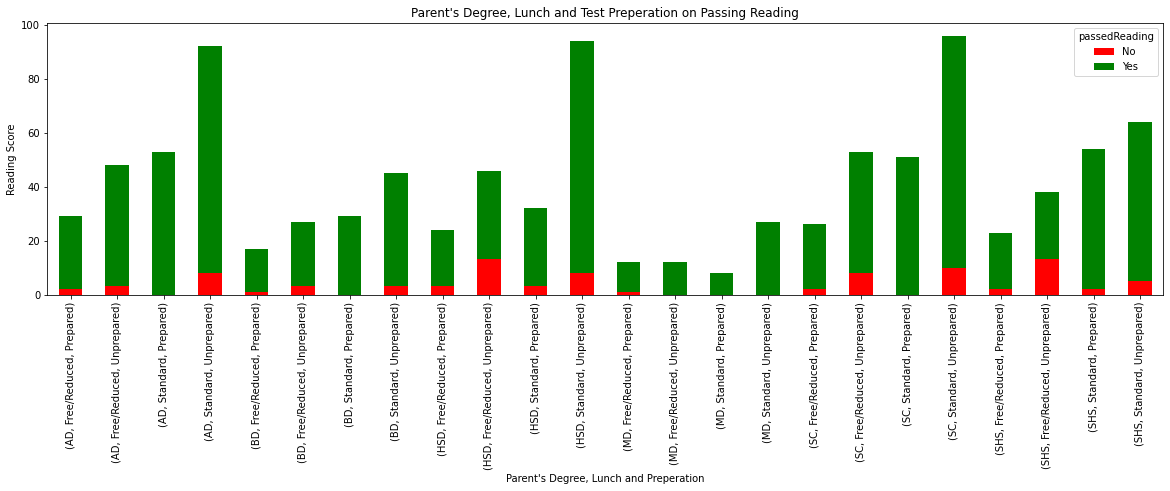

In [24]:
# Using table data to create grouped plot
spBar_R = groupedSP_R.plot.bar(stacked=True, color = ["red", "green"], 
figsize=(20,5), title="Parent's Degree, Lunch and Test Preperation on Passing Reading")
plt.ylabel("Reading Score")
plt.xlabel('Parent\'s Degree, Lunch and Preperation')
plt.show(spBar_R)

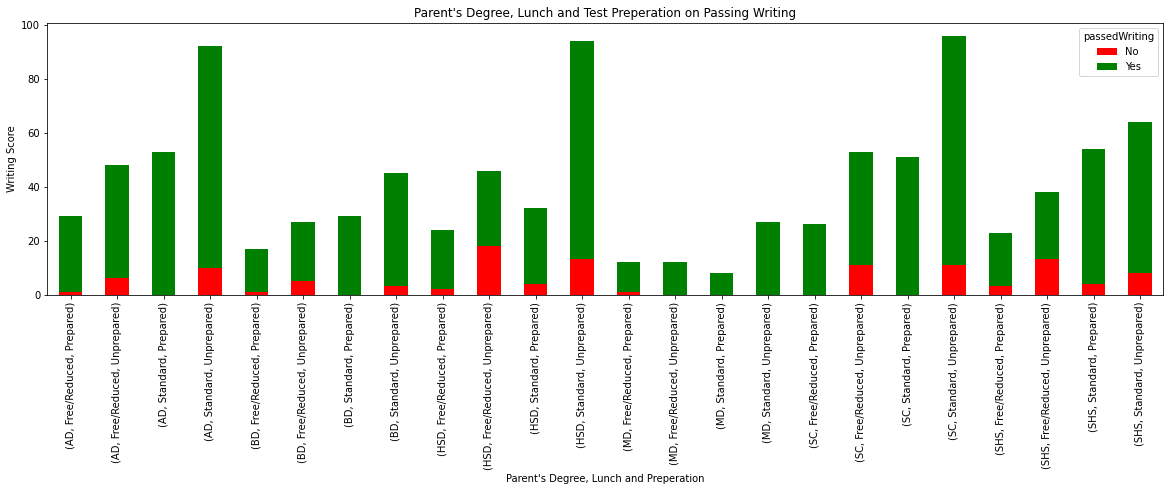

In [25]:
# Using table data to create grouped plot
spBar_W = groupedSP_W.plot.bar(stacked=True, color = ["red", "green"], 
figsize=(20,5), title="Parent's Degree, Lunch and Test Preperation on Passing Writing")
plt.ylabel("Writing Score")
plt.xlabel('Parent\'s Degree, Lunch and Preperation')
plt.show(spBar_W)

<h3>Discussion</h3>

This assignment explored the affect that parent's education, lunch and level of preperation had on student's performance on exams. Through an exploratory analysis of these factors it was revealed that the parent's degree caused the most positive increase in student performance on exams followed by test preperation, then lunch. This was theorized to be because students whose parents achieved a higher tier degree may have instilled studying discipline into their children as well. Addtionally, not having a proper lunch proved to be the most detrimental to a student's performance with the biggest decrease in percentage followed by student's parents having a lower tier degree, then test preperation. Further analysis of the data revealed that the worst combination for poor performance on student exams was student's parents having a lower tier degree, having a free/reduced lunch and showing up unprepared. Therefore this data suggests that in order for students to perform well on exams they should avoid that combination and instead try to prepare well for the exam, eat a full healthy lunch. But, if their parents had a lower tier degree, then students should try and implement disciplined studying regements like the students whose parents who achieved a higher tier degree. 

<h2>References</h2>

1. Source Data - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?select=StudentsPerformance.csv
2. Pandas for Data Manipulation
2. Seaborn for Data Visualization
3. Matplotlib for Data Visualization 